# Tweet Analysis

In [90]:
import pandas as pd

df = pd.read_csv('TrumpTweet.csv')
df2 = df[df['is_retweet']==False][['created_at','text']]

In [91]:
df2.head()

,created_at,text
0,11-07-2020 21:54:48,71000000 Legal Votes. The most EVER for a sitt...
1,11-07-2020 21:53:34,THE OBSERVERS WERE NOT ALLOWED INTO THE COUNTI...
2,11-07-2020 15:36:36,I WON THIS ELECTION BY A LOT!
3,11-07-2020 15:23:00,Georgia Counties Using Same Software as Michig...
4,11-07-2020 15:00:27,Lawyer’s Press Conference at Four Season’s Lan...


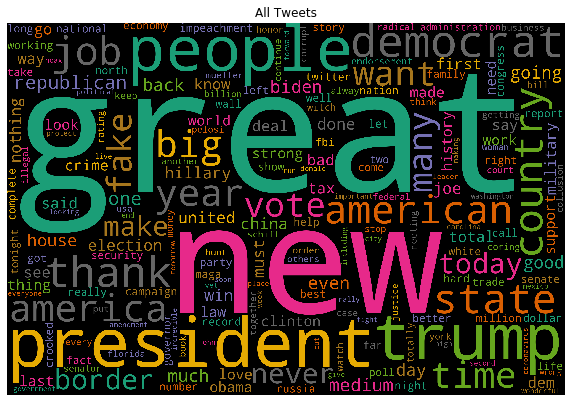

In [92]:
import re
import nltk
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline


stopwords = nltk.corpus.stopwords.words('english')
stopwords += ['amp','rt']
wn = nltk.WordNetLemmatizer()

def tweet_cleaner(text):
    # remove mention
    text = re.sub(r'@[A-Za-z0-9]+', '', text)
    # remove website
    text = re.sub(r'https?://[A-Za-z0-9./]+', '',text)
    # remove non-ASCII
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [wn.lemmatize(word) for word in tokens if word not in stopwords]
    return ' '.join(text)

def plot_cloud(wordcloud, title):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud) 
    plt.title(title)
    plt.axis("off");

df2['text_clean'] = df2['text'].apply(lambda x: tweet_cleaner(x))
all_text = '' .join(list(df2['text_clean'].values))
wordcloud = WordCloud(width = 3000, 
                      height = 2000, 
                      random_state=1, 
                      colormap="Dark2", 
                      collocations=False).generate(all_text)

plot_cloud(wordcloud,'All Tweets')